### SPLITING DATA FOR TRAINING AND TESTING

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
df = pd.read_csv('cleaned_car_data_new.csv')

# Split the dataset into training and testing sets
df_train = pd.DataFrame()
df_test = pd.DataFrame()

# Get unique models and manufacturers
models = df['Model'].unique()
manufacturers = df['Manufacturer'].unique()

for model in models:
    for manufacturer in manufacturers:
        model_manufacturer_pairs = df[(df['Manufacturer'] == manufacturer) & (df['Model'] == model)]
        if(len(model_manufacturer_pairs) != 0):
            train_pairs, test_pairs = train_test_split(model_manufacturer_pairs, test_size=0.2, random_state=12)

            df_train = pd.concat([df_train, train_pairs])
            df_test = pd.concat([df_test, test_pairs])

print(df_train.shape, df_test.shape)

(265, 46) (77, 46)


In [16]:
df_train = df_train.drop(columns=["Manufacturer", "Model", "Fuel Type"])
df_test = df_test.drop(columns=["Manufacturer", "Model", "Fuel Type"])

print(df_train.shape, df_test.shape)

(265, 43) (77, 43)


In [17]:
df_train = df_train.dropna()
df_test = df_test.dropna()

### DATA SCALING

In [18]:
from sklearn.preprocessing import MinMaxScaler

non_bool_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

scaler.fit(df_train[non_bool_columns])

df_train[non_bool_columns] = scaler.transform(df_train[non_bool_columns])
df_test[non_bool_columns] = scaler.transform(df_test[non_bool_columns])

print("Transformed df_train:")
print(df_train.head())

print("\nTransformed df_test:")
print(df_test.head())

Transformed df_train:
        Price  Transmission  ...  Fuel Type_Dizel  Fuel Type_Plin
249  0.412371           0.0  ...             True           False
178  0.309278           0.0  ...             True           False
91   0.206186           0.0  ...             True           False
112  0.231959           0.0  ...             True           False
47   0.103093           0.0  ...            False            True

[5 rows x 43 columns]

Transformed df_test:
        Price  Transmission  ...  Fuel Type_Dizel  Fuel Type_Plin
326  0.489691           0.0  ...             True           False
308  0.489691           0.0  ...             True           False
251  0.412371           0.0  ...            False           False
64   0.128866           0.0  ...             True           False
164  0.309278           0.0  ...            False           False

[5 rows x 43 columns]


### NEURAL NETWORK

In [19]:
from keras import models
from keras import layers
from keras import optimizers

X_train = df_train.drop(columns=['Price'])  
y_train = df_train['Price']
X_test = df_test.drop(columns=['Price'])
y_test = df_test['Price']

print(X_train.shape, X_test.shape)

model = models.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae')

(265, 42) (77, 42)


c:\Users\Ema\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1735 - val_loss: 0.1658
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1500 - val_loss: 0.1444
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1279 - val_loss: 0.1415
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1171 - val_loss: 0.1398
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1252 - val_loss: 0.1378
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1147 - val_loss: 0.1357
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1181 - val_loss: 0.1312
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1138 - val_loss: 0.1319
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1215 - val_loss: 0.1280
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1165 - val_loss: 0.1268
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


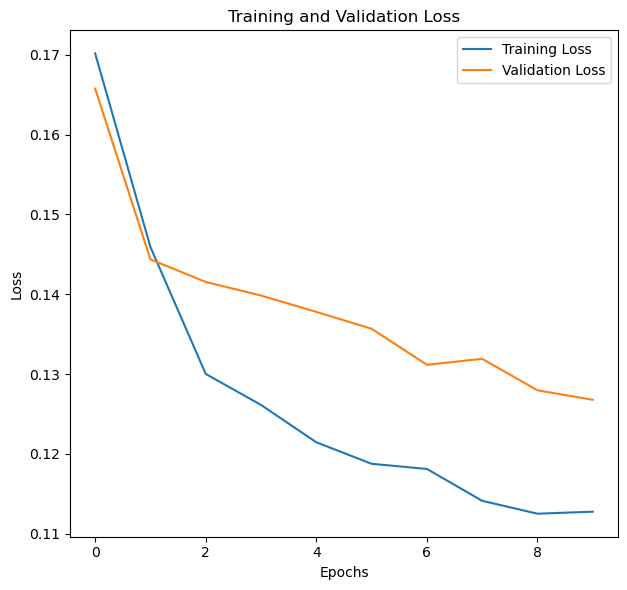

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1274  
Test Loss: 0.1305


In [23]:
print(df_test["Price"])

326    0.489691
308    0.489691
251    0.412371
64     0.128866
164    0.309278
         ...   
273    0.438144
137    0.257732
213    0.360825
218    0.360825
264    0.438144
Name: Price, Length: 77, dtype: float64


### LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.11587129739141962


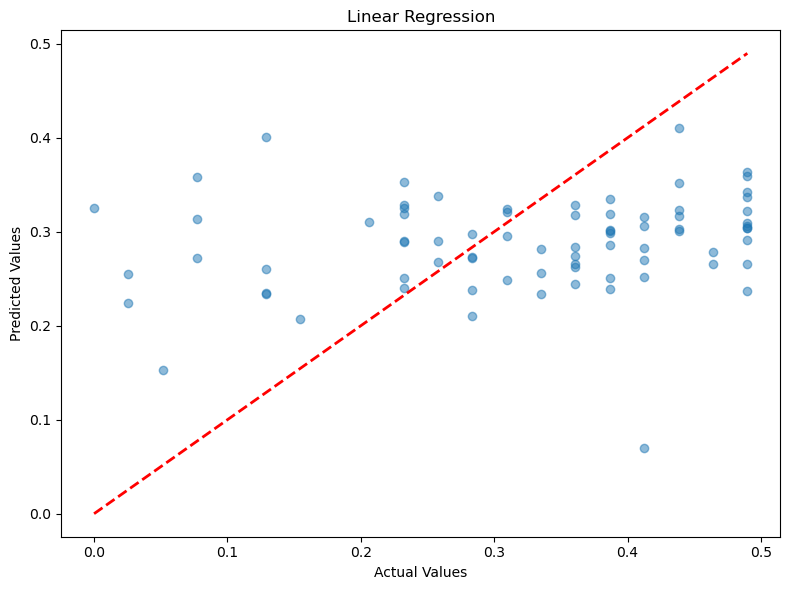

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()